In [1]:
#mainScriptClean

In [2]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt


sys.path.append('/home/jacob/projects/quonium/python')
from config import colr
from config import config
from config import conOutput

from core import box
from mathFunc2 import doConfigCalc,calcClassExpec,calcRelExpec2

col1, col2, col3 = '#EE2211', '#11CC22', '#1111EE'

conf = config()
#Set states and channels + Modify some param settings
conf['StateList'] = ['1S']
#conf['ChannelList'] = ['RGA','RGR','IDQ','IRQ','IDG','IRG']
conf['ChannelList'] = ['RGA','RGR']
#conf['Nbb'], conf['NY'] = 6249, 1 #Low
conf['Nbb'], conf['NY'] = 49999, 1 #Med
#conf['Nbb'], conf['NY'] = 399999, 1 #High
#conf['L'], conf['NXPart'] = 250, 40 #Low
conf['L'], conf['NXPart'] = 500, 40 #Med
#conf['L'], conf['NXPart'] = 1000, 80 #High
conf['NThreads'] = 14
conf['dt'] = 2
conf['tFn'] = 50
#conf['doRecom'] = 0
hbarc = 0.1973
conf.echoParams()

L : 500
dt : 2
T : 0.3
tFn : 50
NY : 1
Nbb : 49999
pSampleType : 0
UniPMax : 3.0
pSampSig : 0.2
MatrElems : 0
qRGtype : 0
ECut : 40
prCut : 22
NPts : 200
ExportRates : True
NXPart : 40
NThreads : 14
HydroMode : 0
HPts : 20
doRecom : 1
doDisso : 1
RGRrateOpt : 1
Mb : 4.65
M1S : 9.091
M2S : 10.023
E1S : 0.20925
E2S : 0.723
bsig : 0.01
Ysig : 0.02
alphaS : 0.3
CF : 1.3333333333333333
NC : 3
gs : 0.75
Ch : 0
rateFile : bottom_rates_2d.tsv
boop : gleep
StateList : ['1S']
ChannelList : ['RGA', 'RGR']


In [3]:
doConfigCalc(conf)

Constants set
RGA_rate1S set
RGR_rateFv1S set


In [4]:
def runBox():
    conOut = conOutput(LabelSpacing = [['t [GeV-1]',12,None],['Nhid/Ntot',24,None],['#D',4,(200,50,50)],['#R',4,(100,100,200)],['StepTime',12,None],['ExpTime',12,None]])
    conOut.printHeader()
    b = box(conf)
    b.recLine()
    for i in range(conf['tFn']):
        b.step()
        b.recLine()
        dN = len(b.dissoEvents)
        rN = len(b.recomEvents)
        conOut.printLine([b.rec[-1][0], b.rec[-1][1], dN, rN, b.cl.getStepTime(), b.cl.getExpectTime()])
    recA = np.array(b.rec) 
    return recA

In [5]:
r = runBox()

t [GeV-1]    Nhid/Ntot                #D   #R   StepTime     ExpTime     
2.0          0.00018                  0    8    00:00:03.55  00:02:54.15 
4.0          0.00028                  0    5    00:00:03.81  00:02:56.78 
6.0          0.00048                  1    11   00:00:03.87  00:02:56.07 
8.0          0.00064                  0    8    00:00:03.79  00:02:52.94 
10.0         0.00078                  3    10   00:00:03.90  00:02:50.47 
12.0         0.00084                  3    6    00:00:03.79  00:02:46.72 
14.0         0.00098                  4    11   00:00:03.81  00:02:43.09 
16.0         0.00104                  2    5    00:00:03.88  00:02:39.76 
18.0         0.00108                  5    7    00:00:03.83  00:02:36.09 
20.0         0.00108                  5    5    00:00:03.92  00:02:32.76 
22.0         0.00104                  7    5    00:00:03.82  00:02:28.95 
24.0         0.00118                  2    9    00:00:04.01  00:02:25.74 
26.0         0.00124                  

In [6]:
classExp = calcClassExpec(conf)
relExp = calcRelExpec2(conf)

nonrel-Nhid/Ntot: 0.001730484230463492
rel-Nhid/Ntot: 0.0014666271038068232


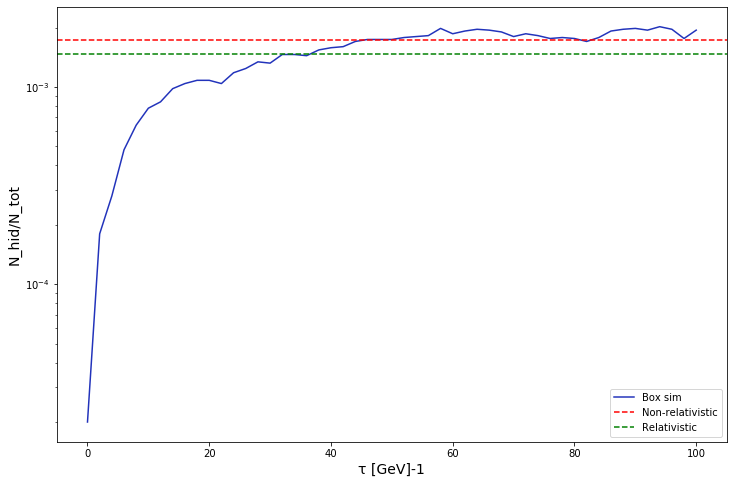

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(r[:,0],r[:,1],color='#2233BB',label='Box sim')
plt.axhline(y=classExp, color='r', linestyle='--', label='Non-relativistic')
plt.axhline(y=relExp, color='g', linestyle='--', label='Relativistic')
plt.xlabel('τ [GeV]-1',fontsize=14)
plt.ylabel('N_hid/N_tot',fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

# RG CHANNEL ONLY


In [9]:
doConfigCalc(conf)
conf['ChannelList'] = ['RGA','RGR','IDQ','IRQ','IDG','IRG']
r = runBox()

Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
t [GeV-1]    Nhid/Ntot                #D   #R   StepTime     ExpTime     
2.0          0.0002                   1    10   00:00:04.45  00:03:38.19 
4.0          0.00036                  0    8    00:00:04.51  00:03:35.12 
6.0          0.00034                  6    5    00:00:04.51  00:03:31.16 
8.0          0.00042                  2    6    00:00:04.40  00:03:25.60 
10.0         0.00058                  2    10   00:00:04.69  00:03:23.17 
12.0         0.00068                  5    10   00:00:04.56  00:03:19.02 
14.0         0.00076                  4    8    00:00:04.63  00:03:15.19 
16.0         0.00082                  6    9    00:00:04.60  00:03:10.97 
18.0         0.00086                  7    9    00:00:04.85  00:03:07.81 
20.0         0.00094                  6    10   00:00:04.70  00:03:03.71 
22.0         0.00102                  5    9  

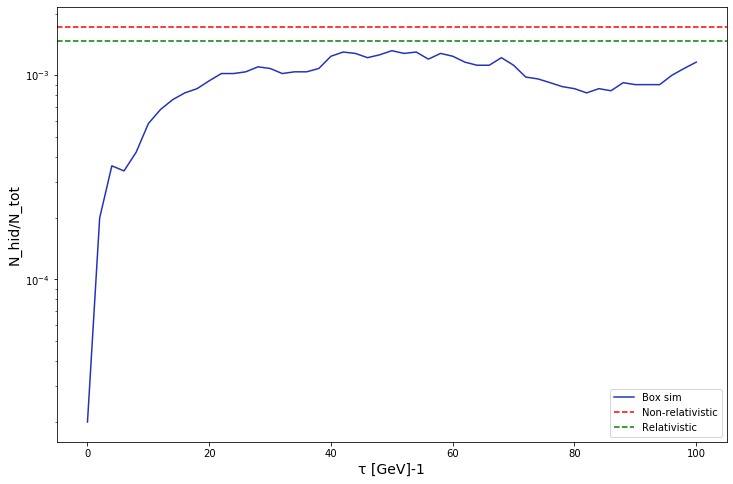

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(r[:,0],r[:,1],color='#2233BB',label='Box sim')
plt.axhline(y=classExp, color='r', linestyle='--', label='Non-relativistic')
plt.axhline(y=relExp, color='g', linestyle='--', label='Relativistic')
plt.xlabel('τ [GeV]-1',fontsize=14)
plt.ylabel('N_hid/N_tot',fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

##### ALL CHANNELS ON